In [7]:
import sys
sys.path.append('../')
import torch, torchuq

'/atlas/u/shengjia/torchuq_release/examples'

In [2]:
from torchuq.calibrate.conformal import ConformalCalibrator
from torchuq.metric.distribution import plot_cdf, plot_icdf

torch.Size([10, 199]) torch.Size([1, 1])
torch.Size([10, 200]) torch.Size([1, 200])
[100, 199] 100
torch.Size([10, 199]) torch.Size([100, 1])
[199] 1
torch.Size([10, 199]) torch.Size([1, 199])


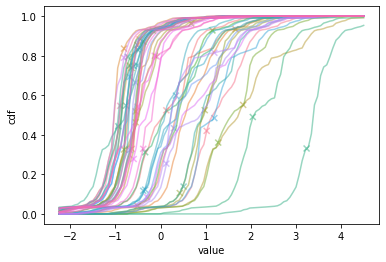

In [10]:
test_data = torch.load('pretrained/crime_particle.tar')
rand_perm = torch.randperm(len(test_data['predictions']))
predictions = test_data['predictions'].transpose(1, 0)
labels = test_data['labels']
train_size = 200
calibrator = ConformalCalibrator(input_type='particle')
calibrator.train(predictions[:, :train_size], labels[:train_size])
preds = calibrator(predictions[:, train_size:])
plot_cdf(preds, labels[train_size:])